# **主成分分析策略：發現數據的真實故事**


---


## 專案前言：

在本次專案中，我們將進行資料探索和主成分分析的任務，分為兩個部分。首先，我們將探索一組關於紅酒的化學成分數據，以及一組有關乳癌患者腫瘤的影像量測資料。這兩個數據集都有其獨特的特徵和挑戰，我們將通過相關性分析、散布圖、主成分分析等方法來深入研究它們。


## 專案目標簡介：

本專案旨在進行資料探索和主成分分析 (PCA) 的兩個部分，分別針對以下兩個數據集：

## 1. 紅酒化學成分數據集
- 繪製相關性圖，檢查變數之間的相關性。
- 繪製盒鬚圖，評估變數的範圍，決定是否需要標準化。
- 執行PCA，繪製特徵值分布圖和Scree Plot，確定主成分數量。
- 繪製紅酒數據的前兩個主成分的散布圖，並根據標籤著色。

## 2. 乳癌患者腫瘤影像量測資料集
- 進行相關性分析，適當視覺化多個變數之間的相關性。
- 選擇適當的數據縮減方法，以簡化複雜的數據集。

通過達成這些目標，我們將深入探索兩個不同的數據集，並利用主成分分析等技術來提取有價值的資訊，以進一步了解數據的結構和關聯性。

---





 ### **資料集（一）：有一組資料來自義大利某個地區三個紅酒製造商所產的紅酒，資料內容包括的 178 支紅酒的 13 種化學成分。利用這組資料回答下列問題：**

導入初步套件

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from numpy.linalg import svd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

資料讀入

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/淺度機器學習/wine.xlsx')
labels = data['Customer_Segment']
data = data.drop("Customer_Segment", axis = 1)
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [ ]:
fontparams = {'font.size': 13, 'font.weight':'bold',
              'font.family':'arial', 'font.style':'italic'}
plt.rcParams.update(fontparams)
labelparams = {'size': 14, 'weight':'semibold',
               'family':'serif', 'style':'italic'}

1. 繪製變數間的相關係數圖，以觀察變數間是否存在相關性




<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

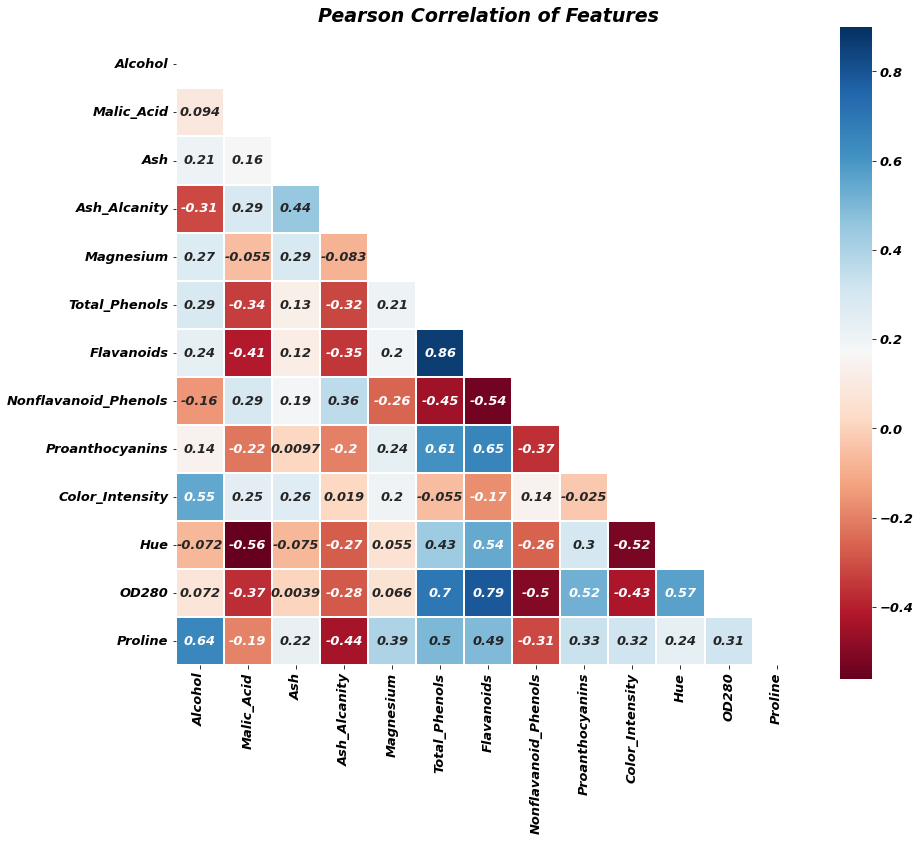

In [ ]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.02, size=19, fontweight = 'bold' )

corr_matrix = data.astype(float).corr() #相關係數矩陣
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, linewidths=0.1, vmax=0.9,
            square=True, mask=mask, cmap=colormap, linecolor='white', annot=True)


以下是觀察自變數間相關性的結論：


*   多數自變數之間存在相關性，且部分相關性很強。
*   最強的相關性為 total_phenols 和 flavanoids 之間，相關係數為0.86，其次是 flavanoids 和 proanthocyanins 之間，相關係數為0.75。
*   酒精濃度 (Alcohol) 和花青素類化合物 (Flavanoids) 、類黃酮化合物 (Proanthocyanins) 、總酚 (Total_phenols) 之間存在中等程度的相關性，相關係數分別為 0.55、0.55、0.51。



---






2. 繪製一張含每個化學成分（變數）的盒鬚圖（Boxplot），觀察每個變數的 scaling，作為是否標準化的參考

<Figure size 720x576 with 0 Axes>

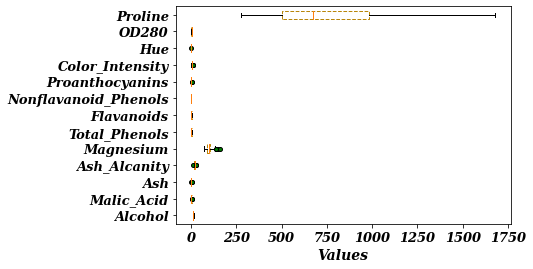

In [ ]:
#老師講義的方法繪製Boxplot

plt.figure(figsize = (10, 8))
plt.rcParams['font.family'] = ['serif']

ratings = np.array(data)
categories = data.columns

fig, ax = plt.subplots()
boxprops = dict(linestyle = '--', linewidth = 1, \
color = 'darkgoldenrod')
flierprops = dict(marker='o', markerfacecolor = 'green',
markersize = 4, linestyle = 'none')
ax.boxplot(ratings, boxprops = boxprops, \
flierprops = flierprops, \
labels = categories, vert = False)
ax.set_xlabel('Values', labelparams)
plt.show()

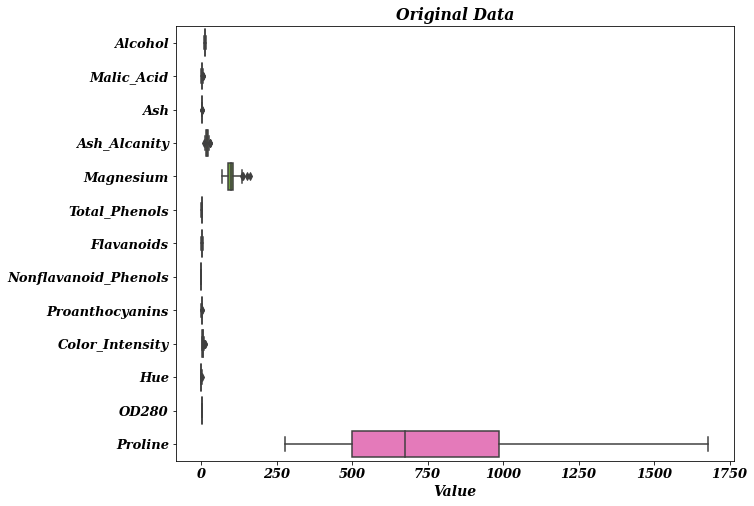

In [ ]:
#使用sns繪製Boxplot, 變數排列方式為水平

import seaborn as sns
import pandas as pd
plt.figure(figsize = (10, 8))
ax = sns.boxplot(data = data, palette = 'husl', orient = 'h')
ax.set_title('Original Data', fontweight = 'bold' )
ax.set_xlabel('Value',labelparams)
plt.show()

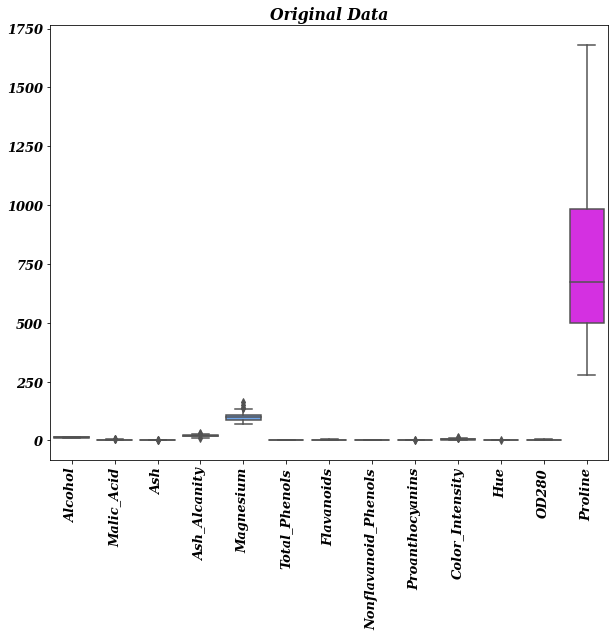

In [ ]:
#使用sns繪製Boxplot, 變數排列方式為垂直

import seaborn as sns
import pandas as pd
plt.figure(figsize = (10, 8))
ax = sns.boxplot(data = data, palette = 'cool')
ax.set_title('Original Data', fontweight = 'bold' )
plt.xticks(rotation = 90, ha = 'center')
plt.show()

因為數據集中的變數'Proline'與其他變數的數據散佈差異程度大，造成箱型圖的可比較能力下降。故對數據集進行標準化，將變數放在相同的比例上觀察。

Text(0.5, 0, 'Value')

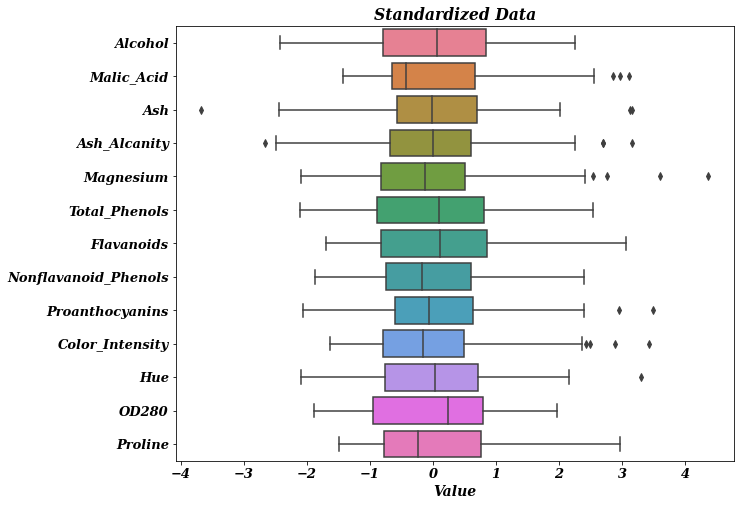

In [ ]:
#使用sns繪製標準化Boxplot, 變數排列方式為水平

# 初始化 StandardScaler 對象
scaler = StandardScaler()

# 應用標準化到數據上
data_scaled = scaler.fit_transform(data)

# 將標準化後的數據轉換成 Pandas DataFrame
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

# 繪製標準化後的Boxplot
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data=data_scaled, palette='husl', orient='h')
ax.set_title('Standardized Data', fontweight='bold')
ax.set_xlabel('Value', labelparams)

標準化後的資料所呈現的箱型圖能夠提供更好的比較能力，相較於標準化前的資料呈現方式。



---



3.
進行主成分分析，繪製特徵值由大而小的分布與 scree plot。



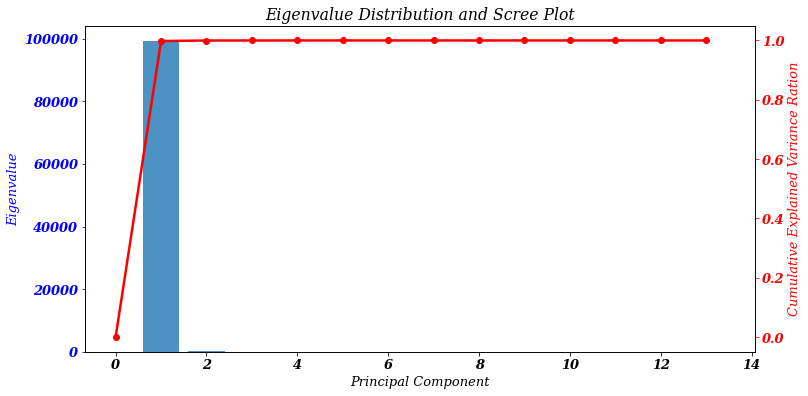

In [ ]:
#創建pca＿raw對象，不進行標準化
pca＿raw = PCA()

# 擬合數據並進行轉換
pca＿raw.fit(data)
transformed＿raw = pca＿raw.transform(data)

# 計算特徵值和特徵向量
eigenvalues = pca＿raw.explained_variance_
eigenvectors = pca＿raw.components_

# 繪製特徵值分佈圖和scree plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# 繪製特徵值條形圖
ax1.bar(range(1, len(eigenvalues)+1), eigenvalues, alpha=0.8)
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Eigenvalue', color='b')
ax1.tick_params('y', colors='b')
ax1.set_title('Eigenvalue Distribution and Scree Plot')

# 繪製累積解釋方差曲線
ax2 = ax1.twinx()
ax2.plot(np.insert(np.cumsum(pca＿raw.explained_variance_ratio_), 0, 0), 'ro-', linewidth=2.5)
ax2.set_ylabel('Cumulative Explained Variance Ration', color='r')
ax2.tick_params('y', colors='r')

plt.show()

根據主成份分析的特徵值分佈圖和累積解釋變異曲線，可以觀察到未經過標準化的數據在進行主成份分析後，第一主成份的特徵值非常大，幾乎解釋了所有的變異。這表明數據集中的 “Proline” 變量比其他變量的值大得多，導致特徵值之間的比較變得不准確。因此，可以推斷出需要對數據進行標準化，以避免單個變量對主成份分析結果的影響過大。

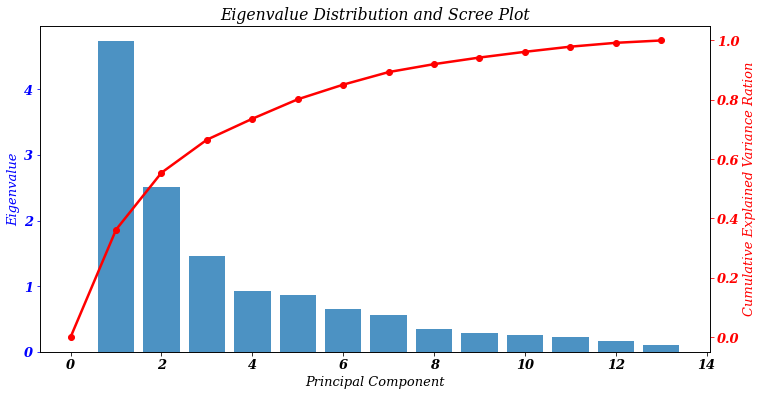

In [ ]:
# 創建PCA對象，進行標準化
pca_normalized = PCA()
scaler = StandardScaler()

# 對數據進行標準化和擬合
data_standardized = scaler.fit_transform(data)
pca_normalized.fit(data_standardized)
transformed_normalized = pca_normalized.transform(data_standardized)

# 計算特徵值和特徵向量
eigenvalues = pca_normalized.explained_variance_
eigenvectors = pca_normalized.components_

# 繪製特徵值分佈圖和scree plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# 繪製特徵值條形圖
ax1.bar(range(1, len(eigenvalues)+1), eigenvalues, alpha=0.8)
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Eigenvalue', color='b')
ax1.tick_params('y', colors='b')
ax1.set_title('Eigenvalue Distribution and Scree Plot')

# 繪製累積解釋方差曲線
ax2 = ax1.twinx()
ax2.plot(np.insert(np.cumsum(pca_normalized.explained_variance_ratio_), 0, 0), 'ro-', linewidth=2.5)
ax2.set_ylabel('Cumulative Explained Variance Ration', color='r')
ax2.tick_params('y', colors='r')

plt.show()

根據主成份分析的特徵值分佈圖和累積解釋變異曲線，經過數據標準化後重新進行主成份分析，可以看到各個特徵值之間的比較更加準確。不再存在像未標準化數據集中出現的單個變量 “Proline” 對主成份分析結果影響過大的情況。因此，通過數據標準化可以使得主成份分析結果更加可靠和穩定。

---



4. 利用主成分分析取得前兩項成分，並繪製其散布圖。

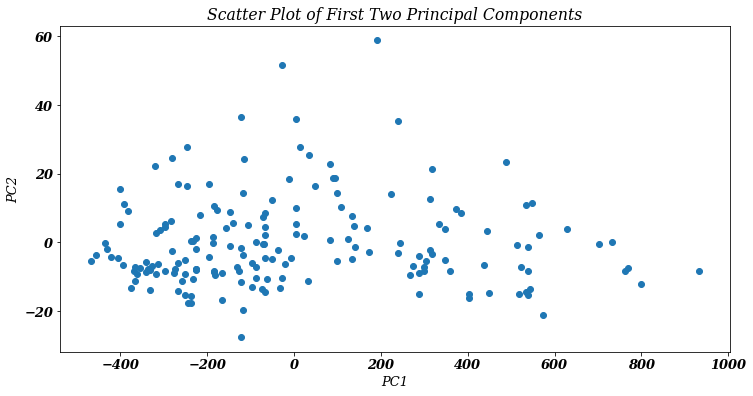

In [ ]:
pc1 = transformed_raw[:, 0]
pc2 = transformed_raw[:, 1]

plt.figure(figsize=(12, 6))
plt.scatter(pc1, pc2)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot of First Two Principal Components')
plt.show()



在標準化前的主成分散布圖中看不出三個群組，這可能是因為數據中存在不同變量之間的數值差異，導致了不同變量之間的權重不均衡。

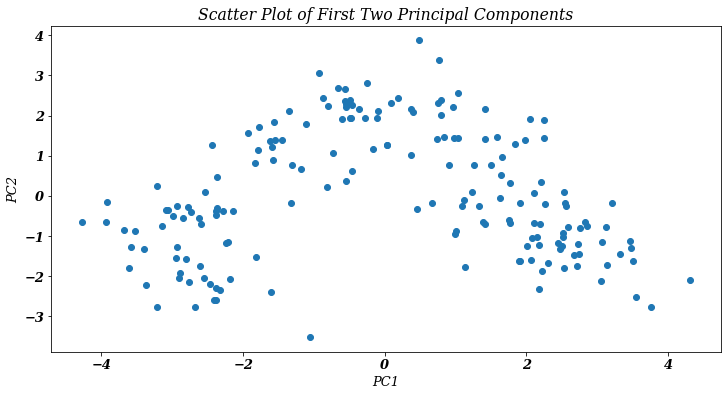

In [ ]:
pc1 = transformed_normalized[:, 0]
pc2 = transformed_normalized[:, 1]

plt.figure(figsize=(12, 6))
plt.scatter(pc1, pc2)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot of First Two Principal Components')
plt.show()

在標準化後的主成分散布圖中能夠看出三個群組，原因可能為標準化後的主成分分析使得數據更平等，更能準確反映每個變量對群組的貢獻。

---



5. 再依據每個資料的標籤，為每個在散布圖上的資料點塗上顏色

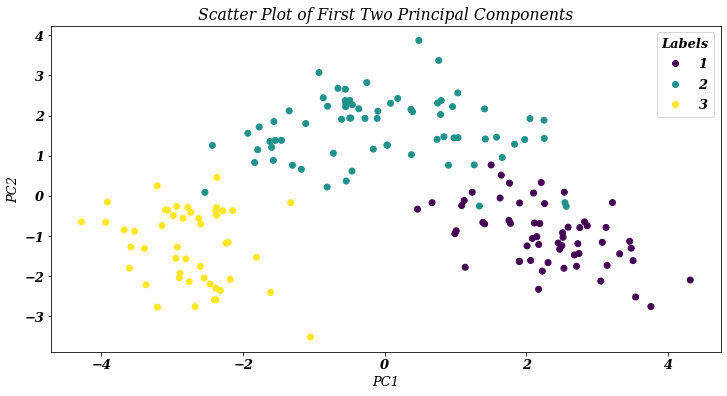

In [ ]:
import matplotlib.pyplot as plt

pc1 = transformed_normalized[:, 0]
pc2 = transformed_normalized[:, 1]

plt.figure(figsize=(12, 6))
scatter = plt.scatter(pc1, pc2, c=labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot of First Two Principal Components')
plt.legend(*scatter.legend_elements(), title="Labels")
plt.show()

在加入labels之後，可以發現前兩個主成分已經可以很好地將數據分成不同的類別，只有第一類和第二類有些微交錯。這表明前兩個主成分已經捕捉到了數據中大部分大部分的差異。

---



6. 採取前三個主成分，並繪製三維散點圖，觀察其在群組分辨能力上是否比前兩個主成分更優秀。

In [ ]:
import plotly.express as px

# 提取前三個主成分
pc1 = transformed_normalized[:, 0]
pc2 = transformed_normalized[:, 1]
pc3 = transformed_normalized[:, 2]

# 將每個點分配到不同的群組
df = pd.DataFrame({'x': pc1, 'y': pc2, 'z': pc3, 'labels': labels})

# 創建三維散點圖(可轉動)
fig = px.scatter_3d(df, x='x', y='y', z='z', color='labels')

# 添加圖例和標籤
fig.update_layout(scene=dict(xaxis_title='PC1', yaxis_title='PC2', zaxis_title='PC3'),
                  showlegend=True, coloraxis_colorbar_tickvals=[1, 2, 3])

fig.show()

觀察三維散點圖後發現，加入前三個主成份對於區分群組的能力略有提高，但是並不明顯。這可能是因為前兩個主成份已經足以有效地區分群組，第三個主成份的加入只會對結果產生微小的影響，並不會明顯提高群組分辨能力。

---



7. Z_1 與 Z_2 都是從原變數組合而成的新變數，可否從 Z_1 與 Z_2 的組成係數，如式 (10)，看出原變數哪個比較重要？哪個比較不重要？若再與原變數間的相關係數圖對照，是否透露相同的訊息。請提出你的觀察心得。

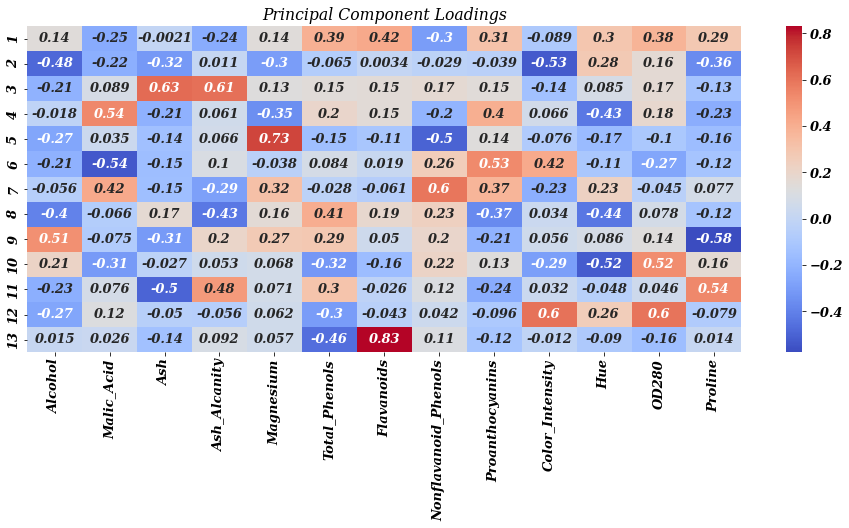

In [ ]:
# 繪製主成分負載圖
plt.figure(figsize=(16, 6))
sns.heatmap(pca_normalized.components_, cmap='coolwarm', annot=True, xticklabels=data.columns, yticklabels=np.arange(1,14))
plt.title('Principal Component Loadings')
plt.show()

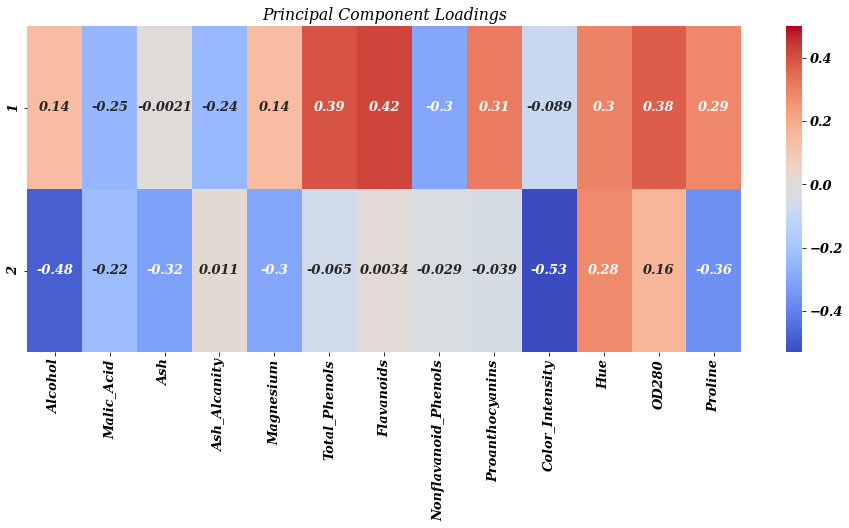

In [ ]:
#僅切割出前兩個主成份的組成係數
plt.figure(figsize=(16, 6))
sns.heatmap(pca_normalized.components_[:2, :], cmap='coolwarm', annot=True,
            xticklabels=data.columns, yticklabels=np.arange(1,3), vmax=0.5)
plt.title('Principal Component Loadings')
plt.show()

從組成係數熱圖可以看出，對於第一個主成分，'Flavanoids'、'total_phenols'和'OD280'這三個變數對第一主成分的貢獻最大，因此可以認為這三個變數比較重要。而'Ash'和'Color_Intensity'這兩個變數對第一主成分的貢獻相對較小，可以認為它們比較不重要。

從第二主成分的組成係數來看，'Alcohol'和'Color_Intensity這兩個變數對第一主成分的貢獻最大，因此可以認為這兩個變數比較重要。而'Flavanoids'這個變數的係數則為最接近零，表示這個變數對第二主成分的貢獻相對較小，可以認為它比較不重要。

第一主成分中的三個變數'Flavanoids'、'total_phenols'和'OD280' 的相關係數如下：

*   'Flavanoids' 和 'total_phenols' 的相關係數為 0.86

*   'total_phenols' 和 'OD280' 的相關係數為 0.7

*   'Flavanoids' 和 'OD280' 的相關係數為 0.79

可以看出，第一個主成分主要由 'Flavanoids'、'total_phenols' 和 'OD280' 三個變量組成，且它們之間的組成係數相當接近。這與它們之間的相關性較高是一致的

對於第二個主成分：

*  'Alcohol'和'Color_Intensity'的相關係數為0.55

可以看出，第二個主成分主要由'Alcohol'和'Color_Intensity' 這兩個變量組成，且它們之間的組成係數相當接近。這與它們之間的相關性較高是一致的

---




 ### **資料集（二）：資料則是同樣來自 sklearn.datasets 的一組關於乳癌患者腫瘤的影像量測資料。量測變數 30 個，樣本數 569 位患者，區分為兩個群組，分別是 Malignant（惡性腫瘤）與 Benign（良性腫瘤）。請注意，由於變數多，因此如前一練習的相關性圖，必須做些改變。**

導入初步套件

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D


In [ ]:
fontparams = {'font.size': 13.5, 'font.weight':'bold',
              'font.family':'arial', 'font.style':'italic'}
plt.rcParams.update(fontparams)
labelparams = {'size': 14.5, 'weight':'semibold',
               'family':'serif', 'style':'italic'}

資料讀入

In [ ]:
# 載入乳癌資料集
cancer = load_breast_cancer()
labels = pd.Series(cancer.target, name='label')
# 轉換為 pandas DataFrame
data = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

這個資料集中所有的特徵變數皆完整無缺失值，且其資料型態為數值型，方便進行進一步的分析。

---



1. 繪製變數間的相關係數圖，以觀察變數間是否存在相關性


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

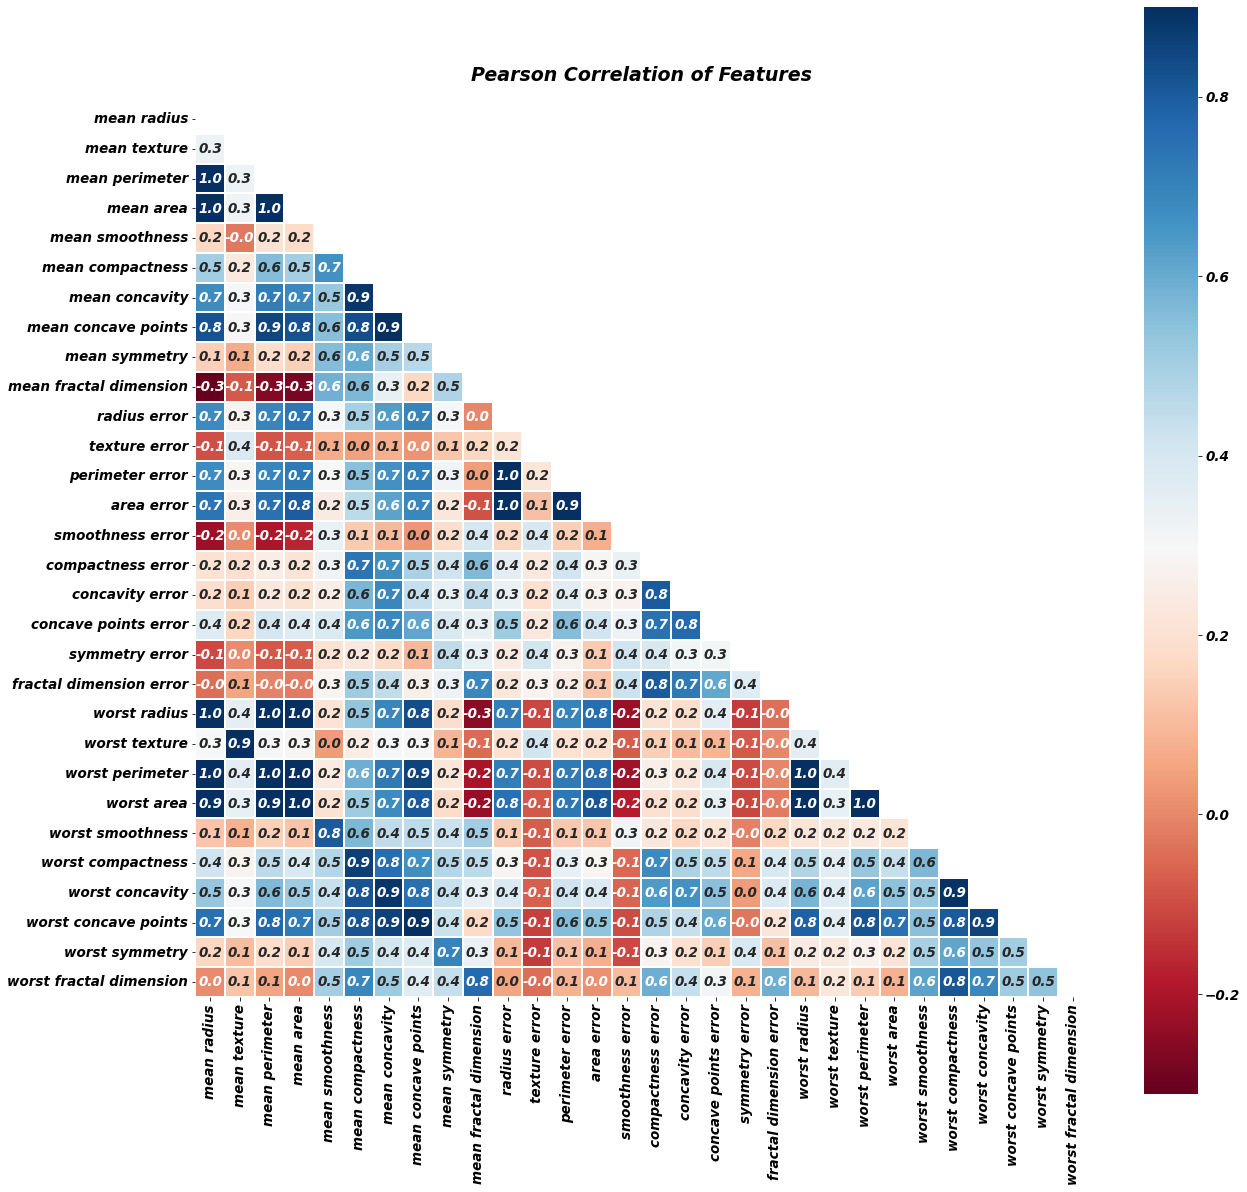

In [ ]:
colormap = plt.cm.RdBu
plt.figure(figsize=(20,20))
plt.title('Pearson Correlation of Features', y=1.02, size=19, fontweight = 'bold' )

corr_matrix = data.astype(float).corr() #相關係數矩陣
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, fmt= '.1f', linewidths=0.1, vmax=0.9,
            square=True, mask=mask, cmap=colormap, linecolor='white', annot=True)


由於相關係數矩陣過大，我選擇將其進行**簡化處理**。

以下為進行相關係數矩陣簡化的三種方式：

* 拆分相關係數矩陣成兩半，分別繪製兩個子矩陣的相關係數圖，減少圖形中變量數量。

* 選擇相同特徵的變量，繪製它們之間的相關係數圖，更好地理解特定特徵之間的關係。

* 篩選出與目標變數高度相關的變量，再繪製相關係數圖，更好地理解目標變數與其他變量之間的關係，提高繪圖效率。

方式1:拆分相關係數矩陣

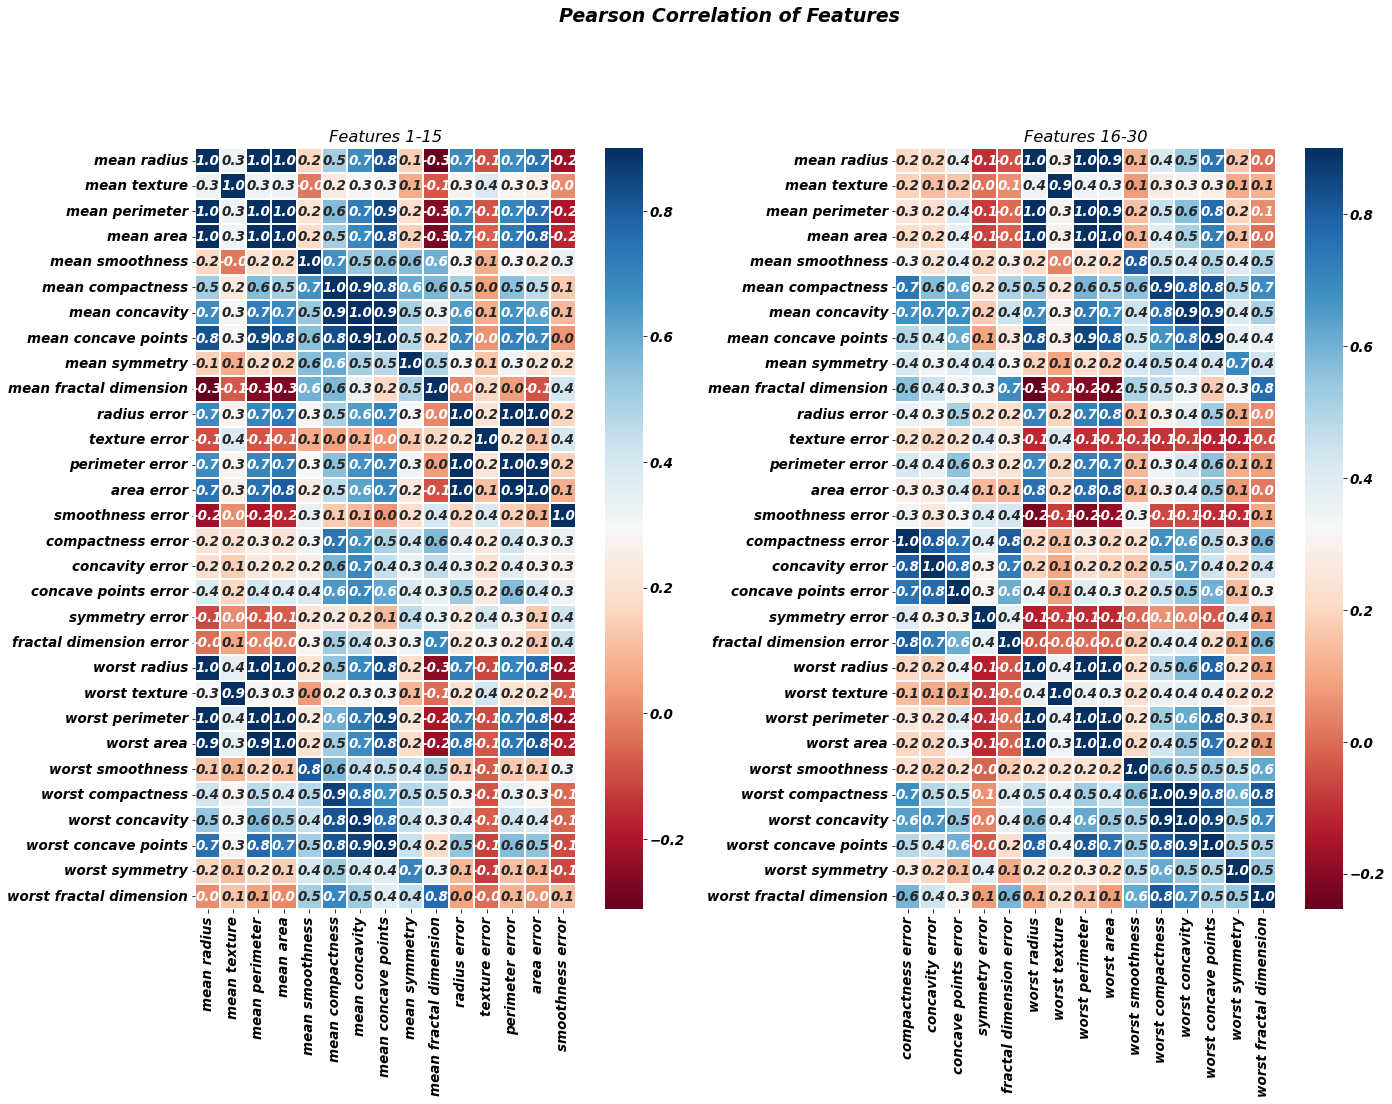

In [ ]:
colormap = plt.cm.RdBu
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(23, 14))
fig.suptitle('Pearson Correlation of Features',
             y=1.02, size=19, fontweight='bold')

corr_matrix = data.astype(float).corr() # 相關係數矩陣

sns.heatmap(corr_matrix.iloc[:, :15], fmt='.1f',
            linewidths=0.1, vmax=0.9,
            square=True, cmap=colormap, linecolor='white', annot=True, ax=axs[0])
axs[0].set_title('Features 1-15')

sns.heatmap(corr_matrix.iloc[:, 15:], fmt='.1f',
            linewidths=0.1, vmax=0.9,
            square=True, cmap=colormap, linecolor='white', annot=True, ax=axs[1])
axs[1].set_title('Features 16-30')
plt.show()



---



方式2:相同特徵下的相關係數矩陣

In [ ]:
#特徵篩選
data.columns
features_mean = data.columns[0:10]
features_error = data.columns[10:20]
features_worst = data.columns[20:]

[Text(0, 0.5, 'mean radius'),
 Text(0, 1.5, 'mean texture'),
 Text(0, 2.5, 'mean perimeter'),
 Text(0, 3.5, 'mean area'),
 Text(0, 4.5, 'mean smoothness'),
 Text(0, 5.5, 'mean compactness'),
 Text(0, 6.5, 'mean concavity'),
 Text(0, 7.5, 'mean concave points'),
 Text(0, 8.5, 'mean symmetry'),
 Text(0, 9.5, 'mean fractal dimension')]

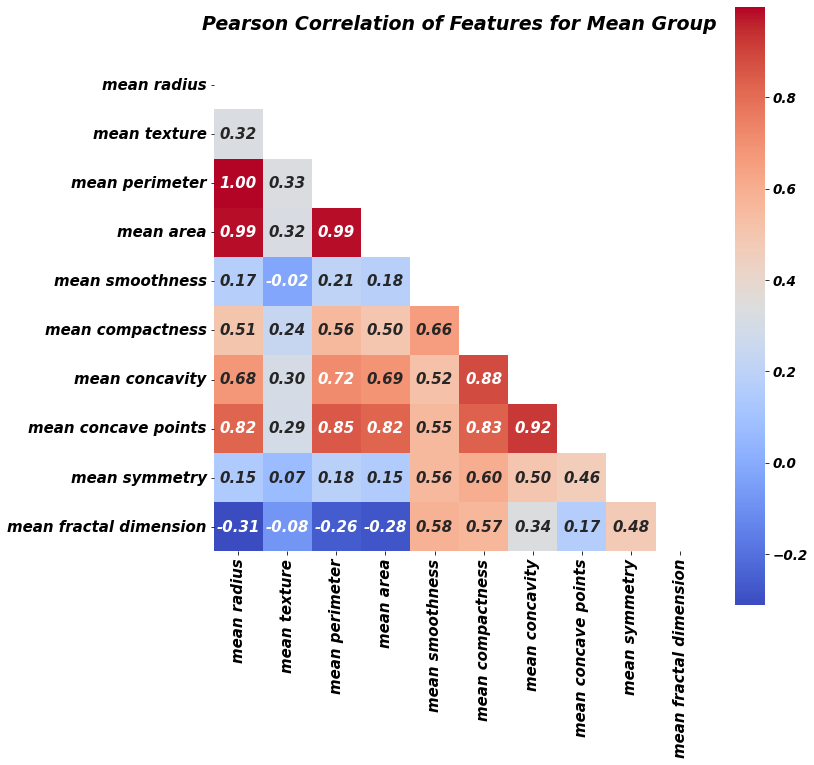

In [ ]:
#繪製mean群組的相關熱力圖
corr_matrix_mean = data[features_mean].corr()

plt.figure(figsize=(11,11))
plt.title('Pearson Correlation of Features for Mean Group',
          y=1.05, size=19, fontweight = 'bold' )
mask = np.triu(np.ones_like(corr_matrix_mean, dtype=bool))
g = sns.heatmap(corr_matrix_mean, cbar = True, annot=True,
                annot_kws={'size': 15}, fmt= '.2f',
                square = True, mask = mask, cmap = 'coolwarm' )
g.set_xticklabels(rotation=90, labels = features_mean, size = 15)
g.set_yticklabels(rotation=0, labels = features_mean, size = 15)


[Text(0, 0.5, 'radius error'),
 Text(0, 1.5, 'texture error'),
 Text(0, 2.5, 'perimeter error'),
 Text(0, 3.5, 'area error'),
 Text(0, 4.5, 'smoothness error'),
 Text(0, 5.5, 'compactness error'),
 Text(0, 6.5, 'concavity error'),
 Text(0, 7.5, 'concave points error'),
 Text(0, 8.5, 'symmetry error'),
 Text(0, 9.5, 'fractal dimension error')]

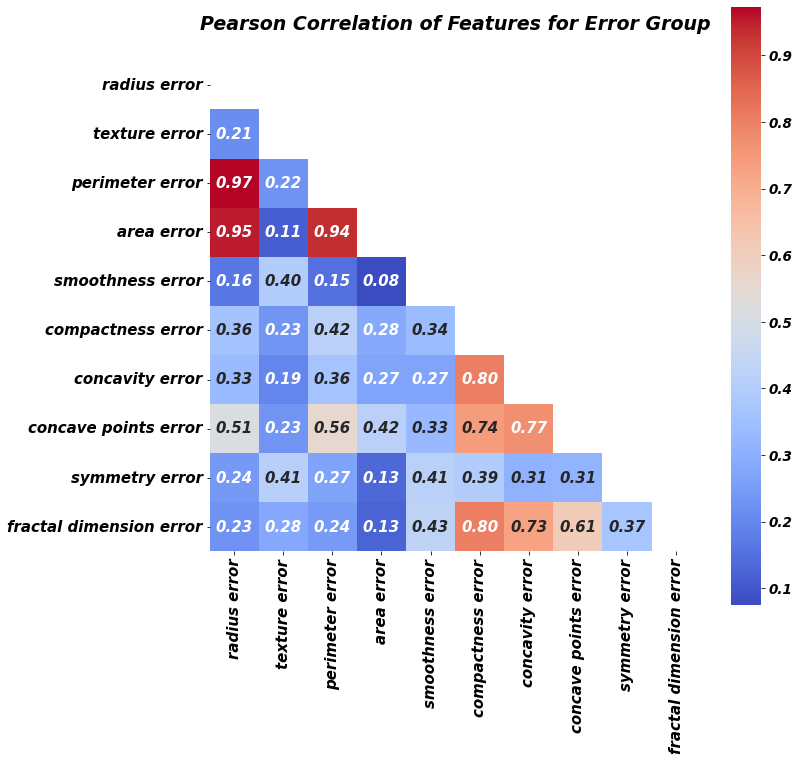

In [ ]:
#繪製error群組的相關熱力圖
corr_matrix_error = data[features_error].corr()

plt.figure(figsize=(11,11))
plt.title('Pearson Correlation of Features for Error Group',
          y=1.05, size=19, fontweight = 'bold' )
mask = np.triu(np.ones_like(corr_matrix_error, dtype=bool))
g = sns.heatmap(corr_matrix_error, cbar = True, annot=True,
                annot_kws={'size': 15}, fmt= '.2f', square = True,
                mask = mask, cmap = 'coolwarm' )
g.set_xticklabels(rotation=90, labels = features_error, size = 15)
g.set_yticklabels(rotation=0, labels = features_error, size = 15)


[Text(0, 0.5, 'worst radius'),
 Text(0, 1.5, 'worst texture'),
 Text(0, 2.5, 'worst perimeter'),
 Text(0, 3.5, 'worst area'),
 Text(0, 4.5, 'worst smoothness'),
 Text(0, 5.5, 'worst compactness'),
 Text(0, 6.5, 'worst concavity'),
 Text(0, 7.5, 'worst concave points'),
 Text(0, 8.5, 'worst symmetry'),
 Text(0, 9.5, 'worst fractal dimension')]

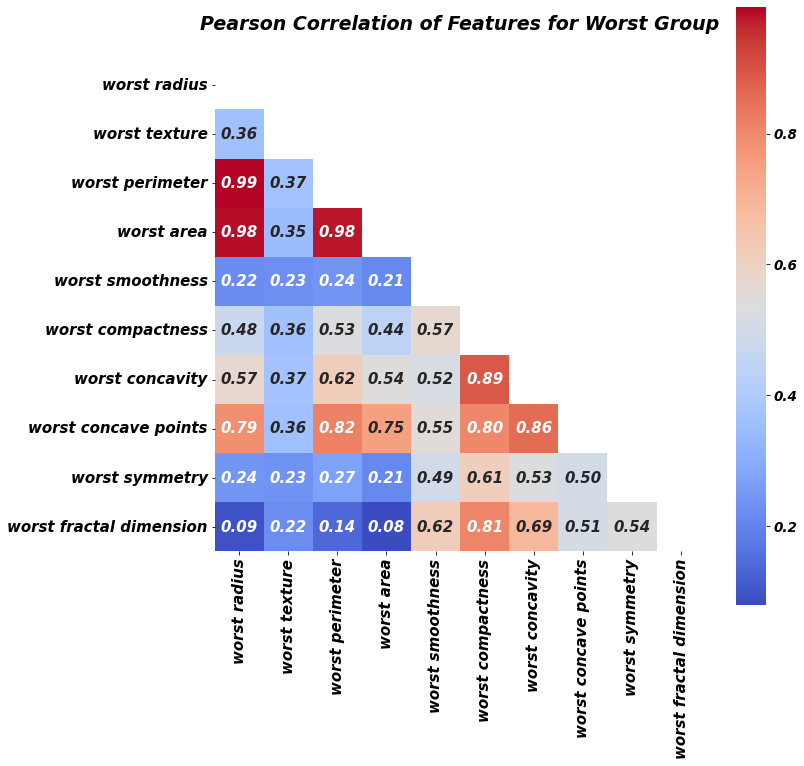

In [ ]:
#繪製worst群組的相關熱力圖
corr_matrix_worst = data[features_worst].corr()

plt.figure(figsize=(11,11))
plt.title('Pearson Correlation of Features for Worst Group',
          y=1.05, size=19, fontweight = 'bold' )
mask = np.triu(np.ones_like(corr_matrix_worst, dtype=bool))
g = sns.heatmap(corr_matrix_worst, cbar = True, annot=True,
                annot_kws={'size': 15}, fmt= '.2f', square = True,
                mask = mask, cmap = 'coolwarm' )
g.set_xticklabels(rotation=90, labels = features_worst, size = 15)
g.set_yticklabels(rotation=0, labels = features_worst, size = 15)




---



方式3:篩選出與目標變數高度相關的變量再繪製相關係數矩陣

In [ ]:
#將原始data併入目標變數label
All_data = pd.concat([data, labels], axis=1)

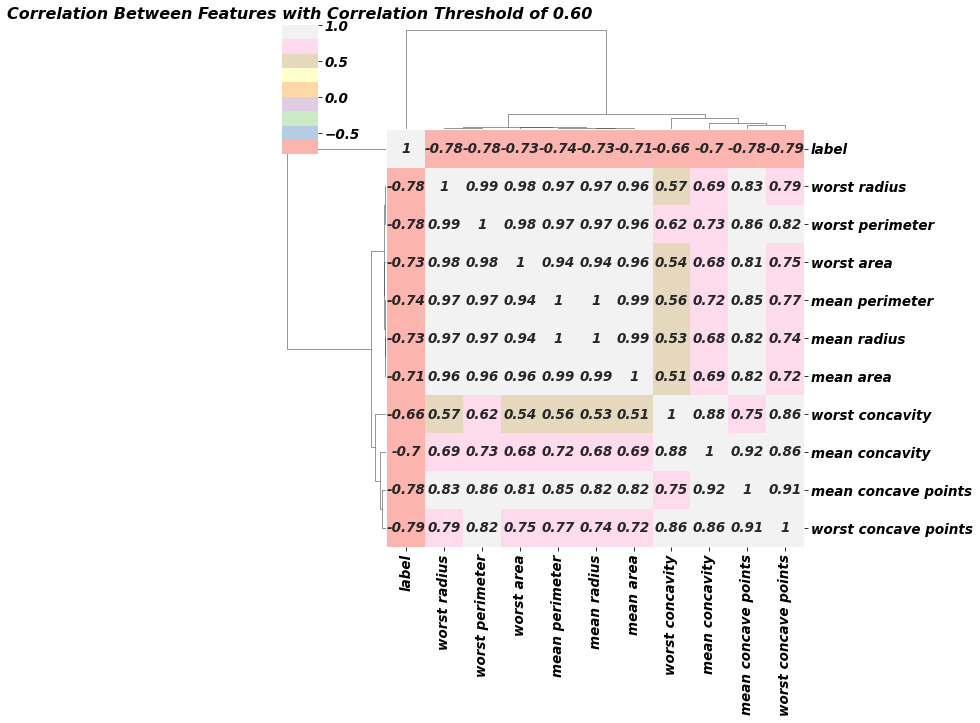

In [ ]:
# 計算所有變數之間的相關係數矩陣
corr_matrix = All_data.corr()

# 設定相關係數閥值
threshold = 0.6

# 找出與目標變數高度相關的變數，建立篩選器
filter = np.abs(corr_matrix["label"]) > threshold

# 將篩選器應用到所有變數中，找出高度相關的變數名稱
corr_features = corr_matrix.columns[filter].tolist()

# 繪製高度相關變數之間的相關係數熱圖
sns.clustermap(All_data[corr_features].corr(),
               annot=True, cmap="Pastel1", vmax=1)
plt.title("Correlation Between Features with Correlation Threshold of 0.60",
          fontweight="bold", fontsize=16)
plt.show()

找出與目標變數高度相關的變數，可以幫助我們縮小分析的範圍，只關注那些對目標變數影響較大的變數。透過繪製這些變數之間的相關係數熱圖，可以讓我們更直觀地了解這些變數之間的相互關係。

綜合以上三種相關係數分析，可以得出以下結果：


*   腫瘤大小相關的變數（mean radius、mean perimeter、mean area、radius error、perimeter error和area error）之間的相關係數都很高（相關係數大於0.9），這意味著它們之間存在著很強的正相關關係。

*   細胞核特徵相關的變數（mean texture、texture error、worst texture、mean smoothness、smoothness error和worst smoothness）之間的相關係數也較高，但是這些變數之間的相關係數比較不明顯（相關係數約在0.6-0.8之間）

*   腫瘤大小相關的變數（mean radius、mean perimeter、mean area、radius error、perimeter error和area error）和細胞核特徵相關的變數（mean texture、texture error、worst texture、mean smoothness、smoothness error和worst smoothness）之間的相關係數也都比較高，這意味著它們之間存在著一定的關聯性。



---



2. 繪製一張含每個變數的盒鬚圖（Boxplot），觀察每個變數的scaling，作為是否標準化的參考。

Text(0.5, 0, 'Value')

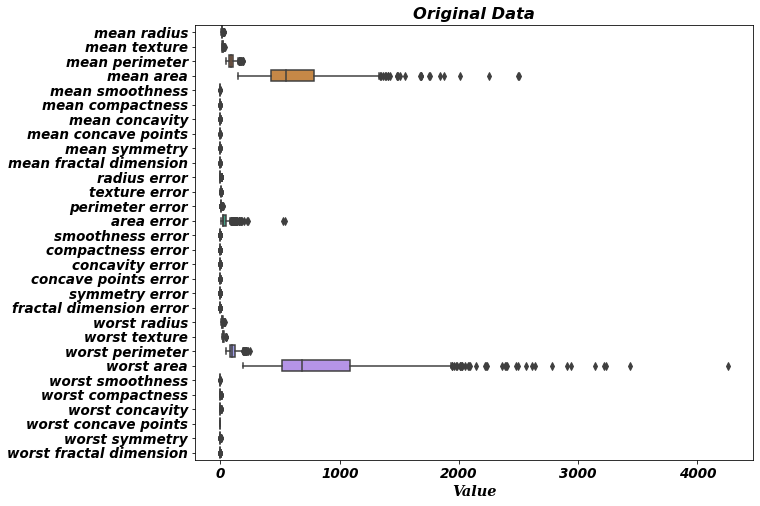

In [ ]:
#使用sns繪製Boxplot, 變數排列方式為水平
plt.figure(figsize = (10, 8))
ax = sns.boxplot(data = data, palette = 'husl', orient = 'h')
ax.set_title('Original Data', fontweight = 'bold' )
ax.set_xlabel('Value',labelparams)

根據上面的箱型圖，我們可以看到 "meanp erimeter"、"mean area "、"mean concavity"、"mean concave points"、"worst radius"、"worst perimeter"、"worst area" 這幾個變數的範圍與其他變數相比差異較大，它們的值偏向於大型值, 所以可以對變數採取標準化。

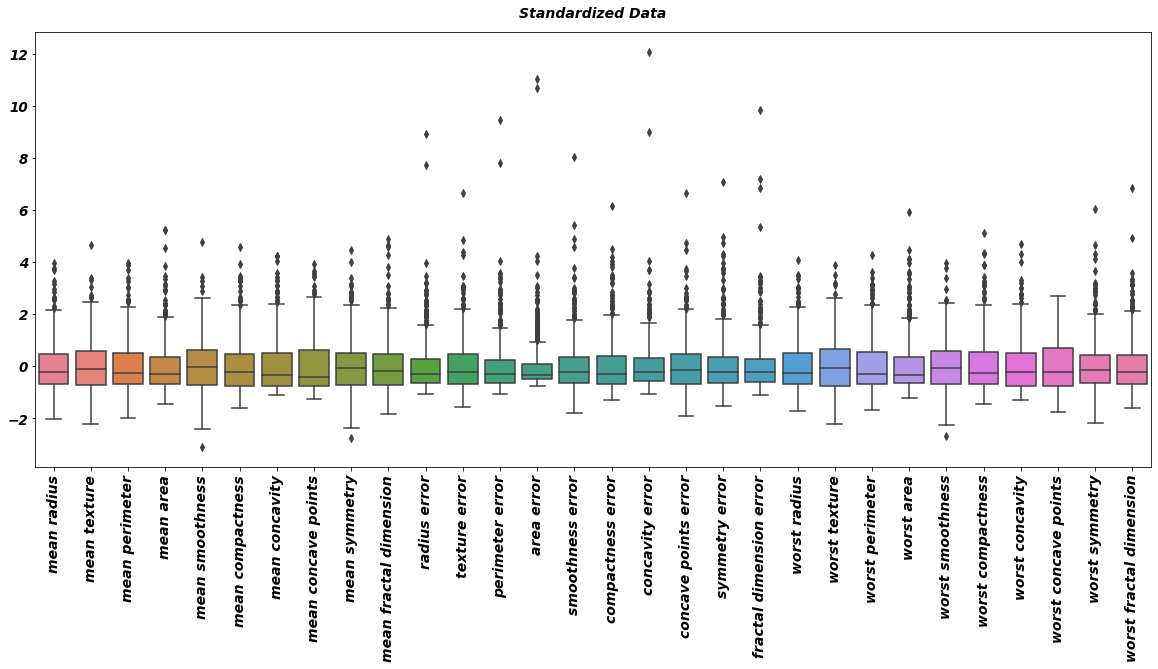

In [ ]:
#使用sns繪製標準化Boxplot, 變數排列方式為水平
# 初始化 StandardScaler 對象
scaler = StandardScaler()

# 應用標準化到數據上
data_scaled = scaler.fit_transform(data)

# 將標準化後的數據轉換成 Pandas DataFrame
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

# 繪製標準化後的Boxplot
plt.figure(figsize=(20, 8))
ax = sns.boxplot(data=data_scaled, palette='husl')
ax.set_title('Standardized Data', y=1.02, size=14, fontweight='bold')
plt.xticks(rotation=90)
ax.tick_params(axis='x', labelsize=14)  # 設定x軸標籤字體大小


在水平方向繪製盒形圖時，由於存在一些離群值(超出過多的極端值)，這些離群值會被繪製在盒形圖的一側，而使得整個盒形圖整體靠左而顯得不太美觀，所以改成繪製垂直的盒形圖。

---



3. 進行主成分分析，繪製特徵值由大而小的分布與 scree plot。

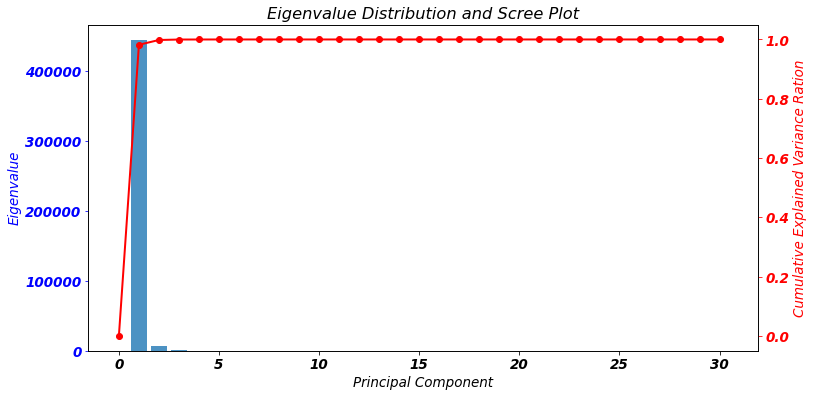

In [ ]:
#創建pca＿raw對象，不進行標準化
pca＿raw = PCA()

# 擬合數據並進行轉換
pca＿raw.fit(data)
transformed＿raw = pca＿raw.transform(data)

# 計算特徵值和特徵向量
eigenvalues = pca＿raw.explained_variance_
eigenvectors = pca＿raw.components_

# 繪製特徵值分佈圖和scree plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# 繪製特徵值條形圖
ax1.bar(range(1, len(eigenvalues)+1), eigenvalues, alpha=0.8)
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Eigenvalue', color='b')
ax1.tick_params('y', colors='b')
ax1.set_title('Eigenvalue Distribution and Scree Plot')

# 繪製累積解釋方差曲線
ax2 = ax1.twinx()
ax2.plot(np.insert(np.cumsum(pca＿raw.explained_variance_ratio_), 0, 0), 'ro-', linewidth=2)
ax2.set_ylabel('Cumulative Explained Variance Ration', color='r')
ax2.tick_params('y', colors='r')
plt.show()
ax.tick_params(axis='x', labelsize=14)  # 設定x軸標籤字體大小


由於未進行標準化，因此在解釋方差方面存在偏差。從特徵值條形圖和累積解釋變異曲線可以看出，第一主成分幾乎解釋了所有的解釋方差，這表明第一主成分可能包含了大部分數據的變異性。

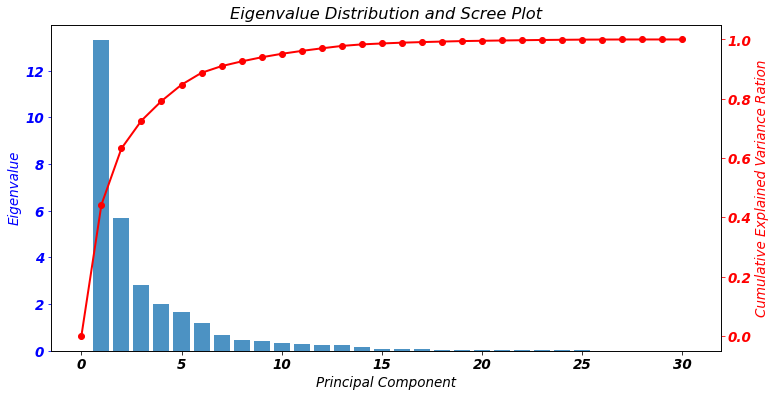

In [ ]:
# 創建PCA對象，進行標準化
pca_normalized = PCA()
scaler = StandardScaler()

# 對數據進行標準化和擬合
data_standardized = scaler.fit_transform(data)
pca_normalized.fit(data_standardized)
transformed_normalized = pca_normalized.transform(data_standardized)

# 計算特徵值和特徵向量
eigenvalues = pca_normalized.explained_variance_
eigenvectors = pca_normalized.components_

# 繪製特徵值分佈圖和scree plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# 繪製特徵值條形圖
ax1.bar(range(1, len(eigenvalues)+1), eigenvalues, alpha=0.8)
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Eigenvalue', color='b')
ax1.tick_params('y', colors='b')
ax1.set_title('Eigenvalue Distribution and Scree Plot')

# 繪製累積解釋方差曲線
ax2 = ax1.twinx()
ax2.plot(np.insert(np.cumsum(pca_normalized.explained_variance_ratio_),
                   0, 0), 'ro-', linewidth=2)
ax2.set_ylabel('Cumulative Explained Variance Ration', color='r')
ax2.tick_params('y', colors='r')

plt.show()

經過標準化後，從特徵值條形圖和累積解釋變異曲線可以看出，前十個主成分能解釋大部分的變異。對於未標準化的情況，這個結果更加可靠。



---



4. 假設先不看這項標籤。利用主成分分析取得前兩項成分，並繪製其散布圖。如是否可以從兩個主成分的散布圖中看出二個群組?

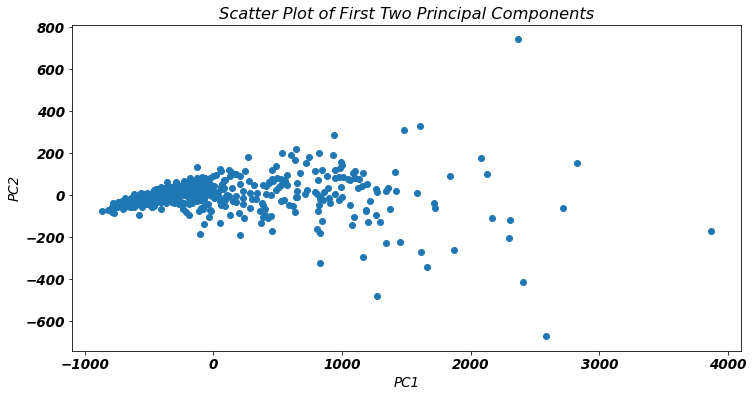

In [ ]:
#繪製未標準化數據的前兩個主成分散布圖
pc1 = transformed_raw[:, 0]
pc2 = transformed_raw[:, 1]

plt.figure(figsize=(12, 6))
plt.scatter(pc1, pc2)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot of First Two Principal Components')
plt.show()

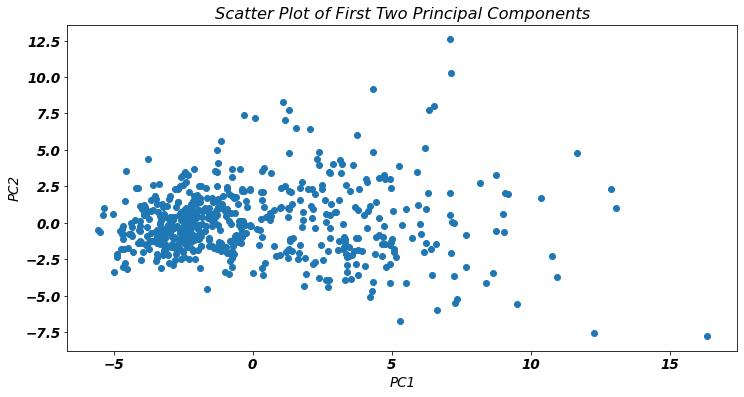

In [ ]:
#繪製標準化數據的前兩個主成分散布圖
pc1 = transformed_normalized[:, 0]
pc2 = transformed_normalized[:, 1]

plt.figure(figsize=(12, 6))
plt.scatter(pc1, pc2)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot of First Two Principal Components')
plt.show()

對於乳癌資料集的未標準化和標準化數據的前兩個主成分散布圖，我認為其分群能力相似。
因為兩張圖的左側都有密集的點群，右側則較為稀疏，這可能暗示著這兩區域代表不同的群組。



---



5. 再依據每個資料的標籤，為每個在散布圖上的資料點塗上顏色

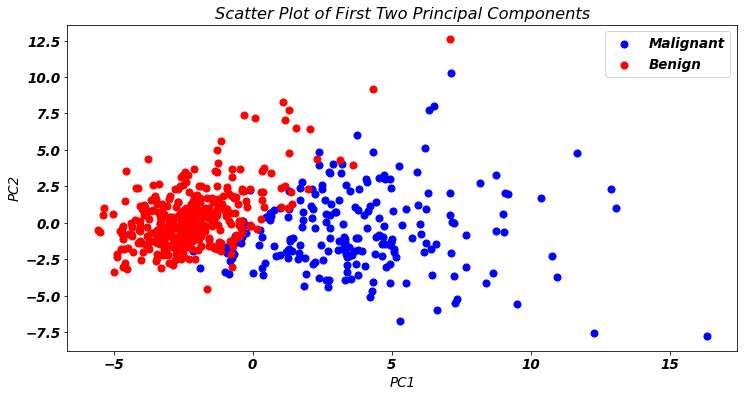

In [ ]:
pc1 = transformed_normalized[:, 0]
pc2 = transformed_normalized[:, 1]

plt.figure(figsize=(12, 6))
plt.scatter(pc1[labels==0], pc2[labels==0], marker='o',
            c='Blue', s=50, label='Malignant')
plt.scatter(pc1[labels==1], pc2[labels==1], marker='o',
            c='Red', s=50, label='Benign')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter Plot of First Two Principal Components')
plt.legend()
plt.show()

根據每個資料點的標籤，在散布圖上為它們塗上顏色後，可以觀察到，這與之前的分群猜測相同。

---



6. 如果採三個主成分是否具備更好的群組分辨能力。請嘗試旋轉立體圖的角度以取得最好的辨別視野。

In [ ]:
import plotly.express as px

# 提取前三個主成分
pc1 = transformed_normalized[:, 0]
pc2 = transformed_normalized[:, 1]
pc3 = transformed_normalized[:, 2]

# 將每個點分配到不同的群組
df = pd.DataFrame({'x': pc1, 'y': pc2, 'z': pc3, 'labels': labels})

# 創建三維散點圖
fig = px.scatter_3d(df, x='x', y='y', z='z', color='labels')

# 設定標題和軸標籤
fig.update_layout(scene=dict(xaxis_title='PC1', yaxis_title='PC2',
                             zaxis_title='PC3'),coloraxis_colorbar_tickvals=[0, 1])

# 顯示圖表
fig.show()


兩個主成分的散布圖在兩群交界處有很多重疊，因此其群組分辨能力相對較差。然而，使用三個主成分所建立的立體圖可以透過旋轉得到更好的辨別視野，能夠更清楚地觀察到不同群組之間的區別，因此具有更好的群組分辨能力。換言之，加入第三個主成分可以更好地呈現資料的特徵，進一步增強群組分辨能力。

---



7. Z_1 與 Z_2 都是從原變數組合而成的新變數，可否從 Z_1 與 Z_2 的組成係數看出原變數哪個比較重要？哪個比較不重要？若再與原變數間的相關係數圖對照，是否透露相同的訊息。請提出你的觀察心得。

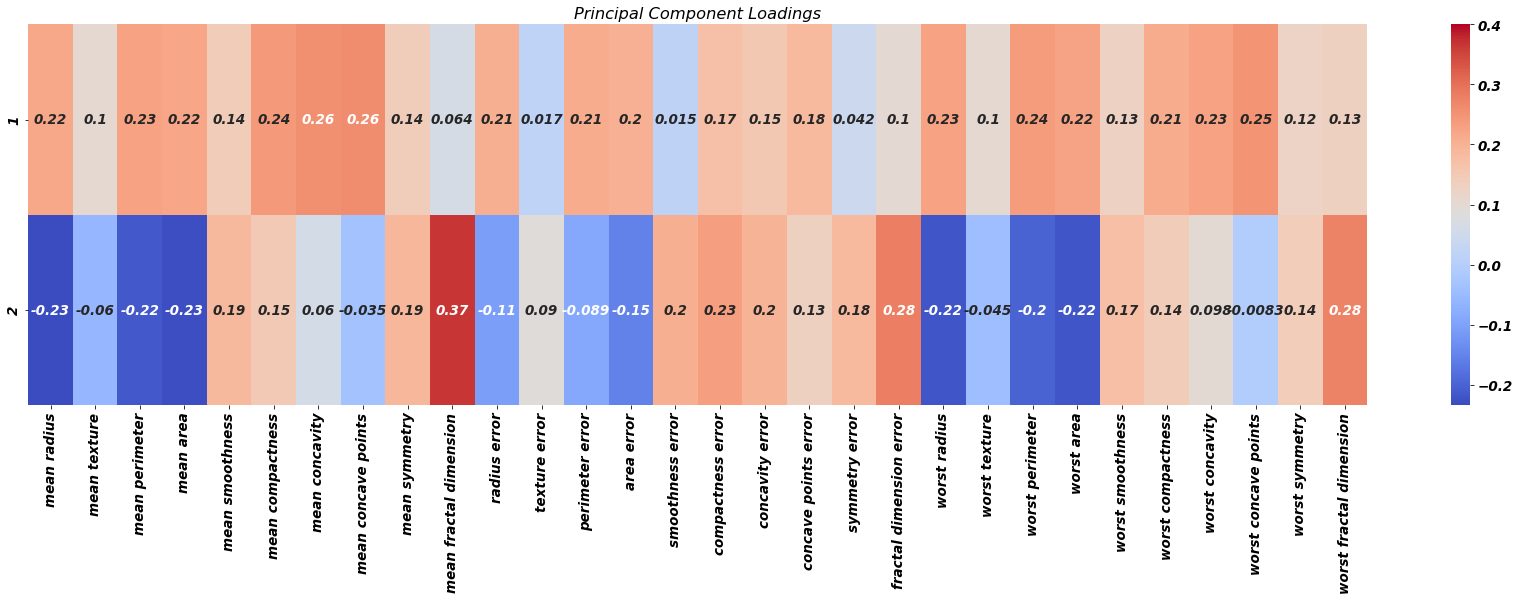

In [ ]:
#僅切割出前兩個主成份的組成係數
plt.figure(figsize=(30, 7))
sns.heatmap(pca_normalized.components_[:2, :], cmap='coolwarm', annot=True,
            xticklabels=data.columns, yticklabels=np.arange(1,3), vmax=0.4)
plt.title('Principal Component Loadings')
plt.show()

根據前兩個主成分的組成係數，可以發現第一個主成分與'mean radius', 'mean
perimeter', 'mean area', 'mean compactness', 'mean concavity', 'mean concave points', 'worst radius', 'worst perimeter', 'worst area', 'worst compactness', 'worst concavity', 'worst concave points'這些變數具有較高的組成係數，顯示這些變數對於第一主成分貢獻較大，可以視為較重要的變數。但其實組成係數都約在0.2左右，表示這幾個變數對於主成分的解釋力差不多，沒有特別突出的變數。

此外，原變數間的相關係數也提供了額外的信息。可以發現第三種相關係數圖 (群集) 包含了'mean radius', 'mean perimeter', 'mean area', 'worst radius', 'worst perimeter', 'worst area'等變數，這些變數之間的相關性超過0.5 (閥值) ，表示它們之間具有較強的相關性。



對於第二主成分'mean fractal dimension', 'worst fractal dimension'和'fractal dimension error'這些變數具有較高的組成係數，顯示這些變數對於第二主成分貢獻較大，可以視為較重要的變數。

此外，在乳癌資料中，'mean fractal dimension'、'worst fractal dimension'和'fractal dimension error'三個變數都代表了腫瘤細胞核的形狀複雜度指標，彼此高度相關。因此，它們在第二主成分中的組成係數也較高是符合預期的。

---



## 結語

在本次資料探索和主成分分析的專案中，我們深入研究了兩個不同的資料集：紅酒化學成分數據集和乳癌患者腫瘤影像量測資料集。透過相關係數分析，我們努力理解變數之間的相關性以及其對資料集的影響。

在紅酒數據集中，我們發現了一些有趣的相關性模式，這有助於我們更好地理解紅酒化學成分之間的關係。通過主成分分析，我們能夠成功地將多維數據壓縮成更少的主成分，並將數據點在二維空間中可視化，進一步揭示了數據的分佈情況。

在乳癌患者腫瘤影像量測資料集中，考慮到數據集的複雜性，我們運用相關性分析的結果來引導數據縮減的過程。這有助於我們減少了多個變數的數據集複雜性，同時保留了重要的信息。

這個專案強調了數據探索和主成分分析在理解和解釋多變數數據時的重要性。通過採用不同的數據可視化和分析技術，我們可以更深入地了解數據的結構，並發現潛在的模式和關聯性。這對於支持決策、模型建構和進一步的分析都具有重要的啟發作用。


---

